In [86]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
import pickle
%matplotlib inline

In [40]:
import warnings
warnings.filterwarnings("ignore")

# Load Dataset..................................

In [2]:
dataset = pd.read_csv("dataset/dataset.csv")
dataset.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
dataset.shape

(4920, 18)

In [4]:
dataset.isnull().sum()

Disease          0
Symptom_1        0
Symptom_2        0
Symptom_3        0
Symptom_4      348
Symptom_5     1206
Symptom_6     1986
Symptom_7     2652
Symptom_8     2976
Symptom_9     3228
Symptom_10    3408
Symptom_11    3726
Symptom_12    4176
Symptom_13    4416
Symptom_14    4614
Symptom_15    4680
Symptom_16    4728
Symptom_17    4848
dtype: int64

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Disease     4920 non-null   object
 1   Symptom_1   4920 non-null   object
 2   Symptom_2   4920 non-null   object
 3   Symptom_3   4920 non-null   object
 4   Symptom_4   4572 non-null   object
 5   Symptom_5   3714 non-null   object
 6   Symptom_6   2934 non-null   object
 7   Symptom_7   2268 non-null   object
 8   Symptom_8   1944 non-null   object
 9   Symptom_9   1692 non-null   object
 10  Symptom_10  1512 non-null   object
 11  Symptom_11  1194 non-null   object
 12  Symptom_12  744 non-null    object
 13  Symptom_13  504 non-null    object
 14  Symptom_14  306 non-null    object
 15  Symptom_15  240 non-null    object
 16  Symptom_16  192 non-null    object
 17  Symptom_17  72 non-null     object
dtypes: object(18)
memory usage: 692.0+ KB


In [6]:
dataset.describe()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
count,4920,4920,4920,4920,4572,3714,2934,2268,1944,1692,1512,1194,744,504,306,240,192,72
unique,41,34,48,54,50,38,32,26,21,22,21,18,11,8,4,3,3,1
top,Fungal infection,vomiting,vomiting,fatigue,high_fever,headache,nausea,abdominal_pain,abdominal_pain,yellowing_of_eyes,yellowing_of_eyes,irritability,malaise,muscle_pain,chest_pain,chest_pain,blood_in_sputum,muscle_pain
freq,120,822,870,726,378,348,390,264,276,228,198,120,126,72,96,144,72,72


In [7]:
dataset = dataset.fillna(0)

In [8]:
dataset.isnull().sum()

Disease       0
Symptom_1     0
Symptom_2     0
Symptom_3     0
Symptom_4     0
Symptom_5     0
Symptom_6     0
Symptom_7     0
Symptom_8     0
Symptom_9     0
Symptom_10    0
Symptom_11    0
Symptom_12    0
Symptom_13    0
Symptom_14    0
Symptom_15    0
Symptom_16    0
Symptom_17    0
dtype: int64

# Data Visualization...................

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

### Disease column........

In [10]:
dataset['Disease'].value_counts()

Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
Allergy      

In [11]:
len(dataset['Disease'].value_counts())   #41*120 = 4920

41

### Symptom_1........

In [12]:
dataset["Symptom_1"].value_counts()

 vomiting                       822
 fatigue                        690
itching                         678
 skin_rash                      480
 chills                         474
 joint_pain                     462
 continuous_sneezing            222
 headache                       126
 acidity                        120
 stomach_pain                   114
 constipation                   114
 muscle_weakness                114
 burning_micturition            108
 muscle_wasting                 108
 back_pain                      108
 bladder_discomfort              12
 weight_gain                     12
 breathlessness                  12
 yellowish_skin                  12
 weakness_in_limbs               12
 chest_pain                      12
 cough                           12
 sunken_eyes                     12
 patches_in_throat               12
 indigestion                     12
 shivering                       12
 pain_during_bowel_movements      6
 cramps                     

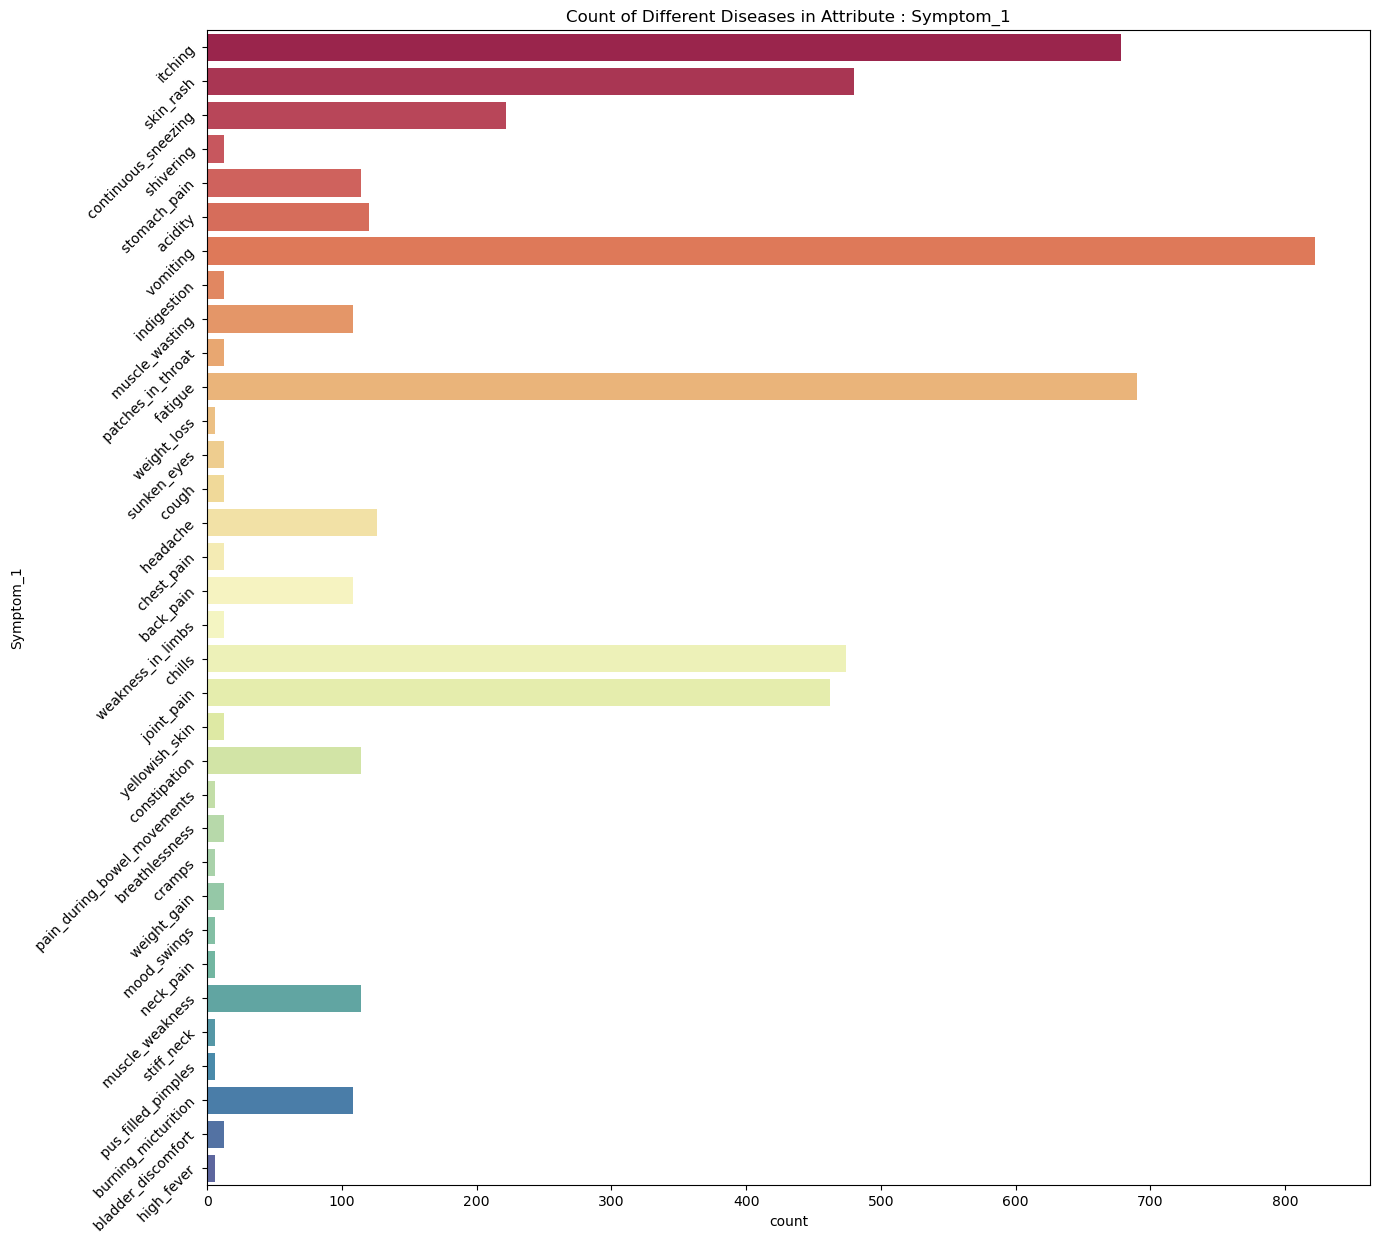

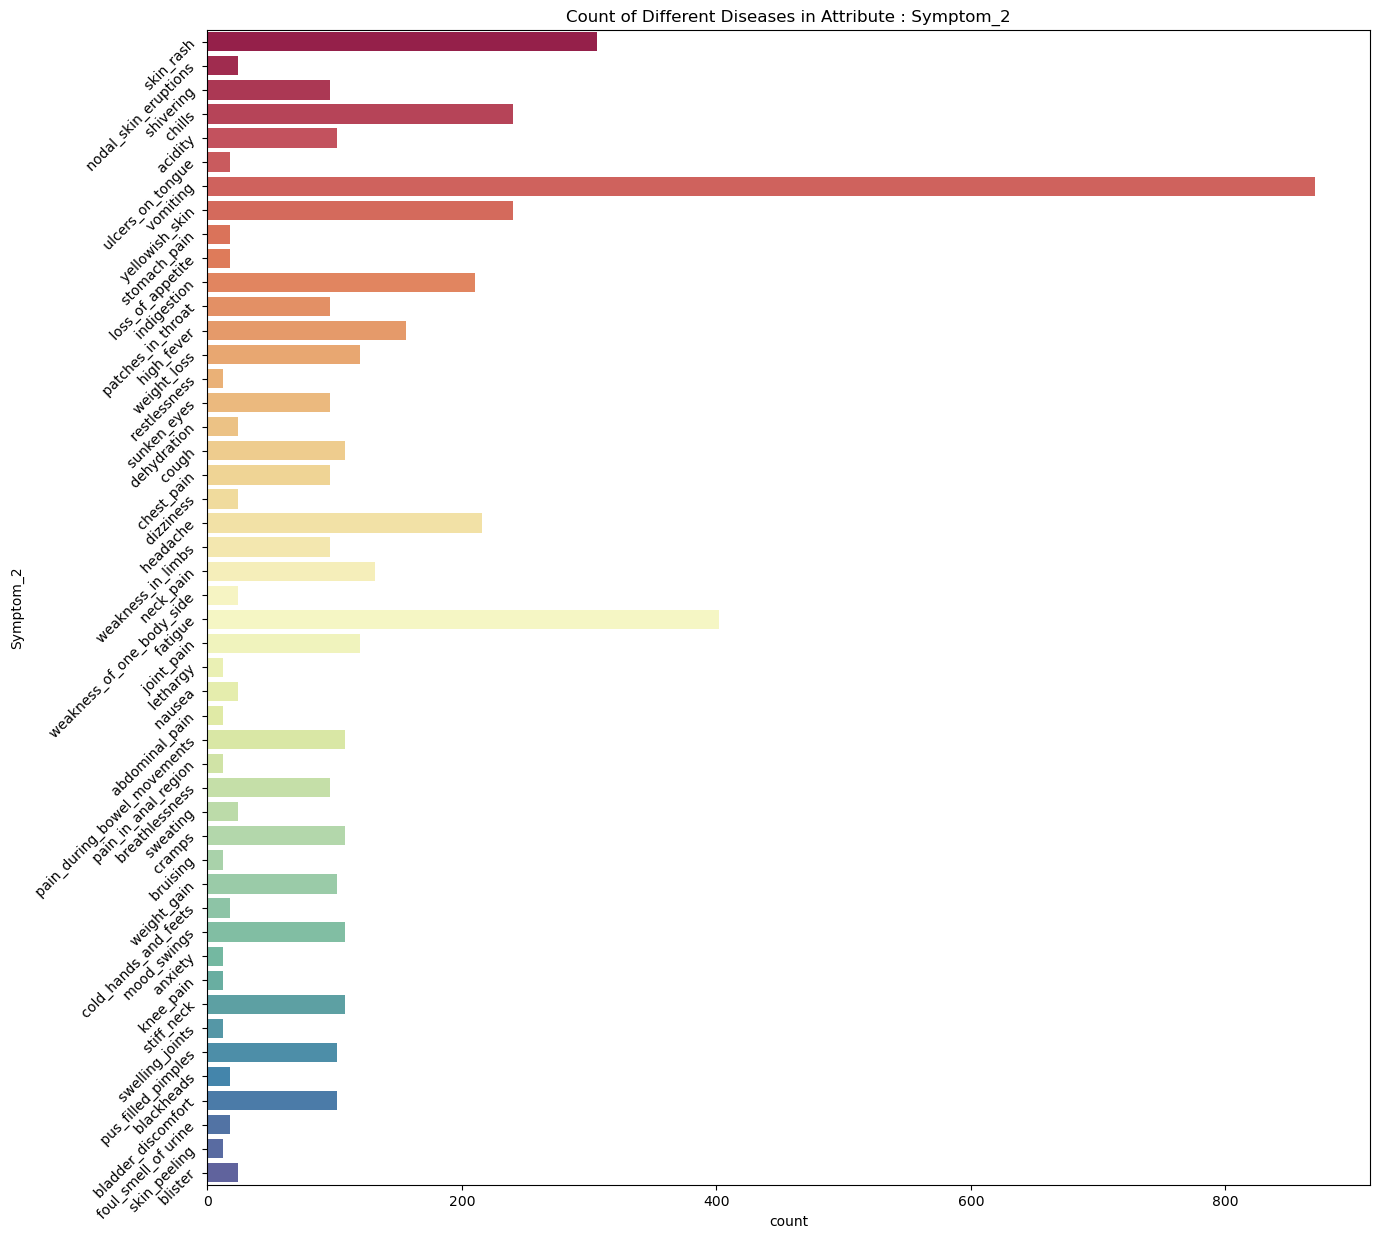

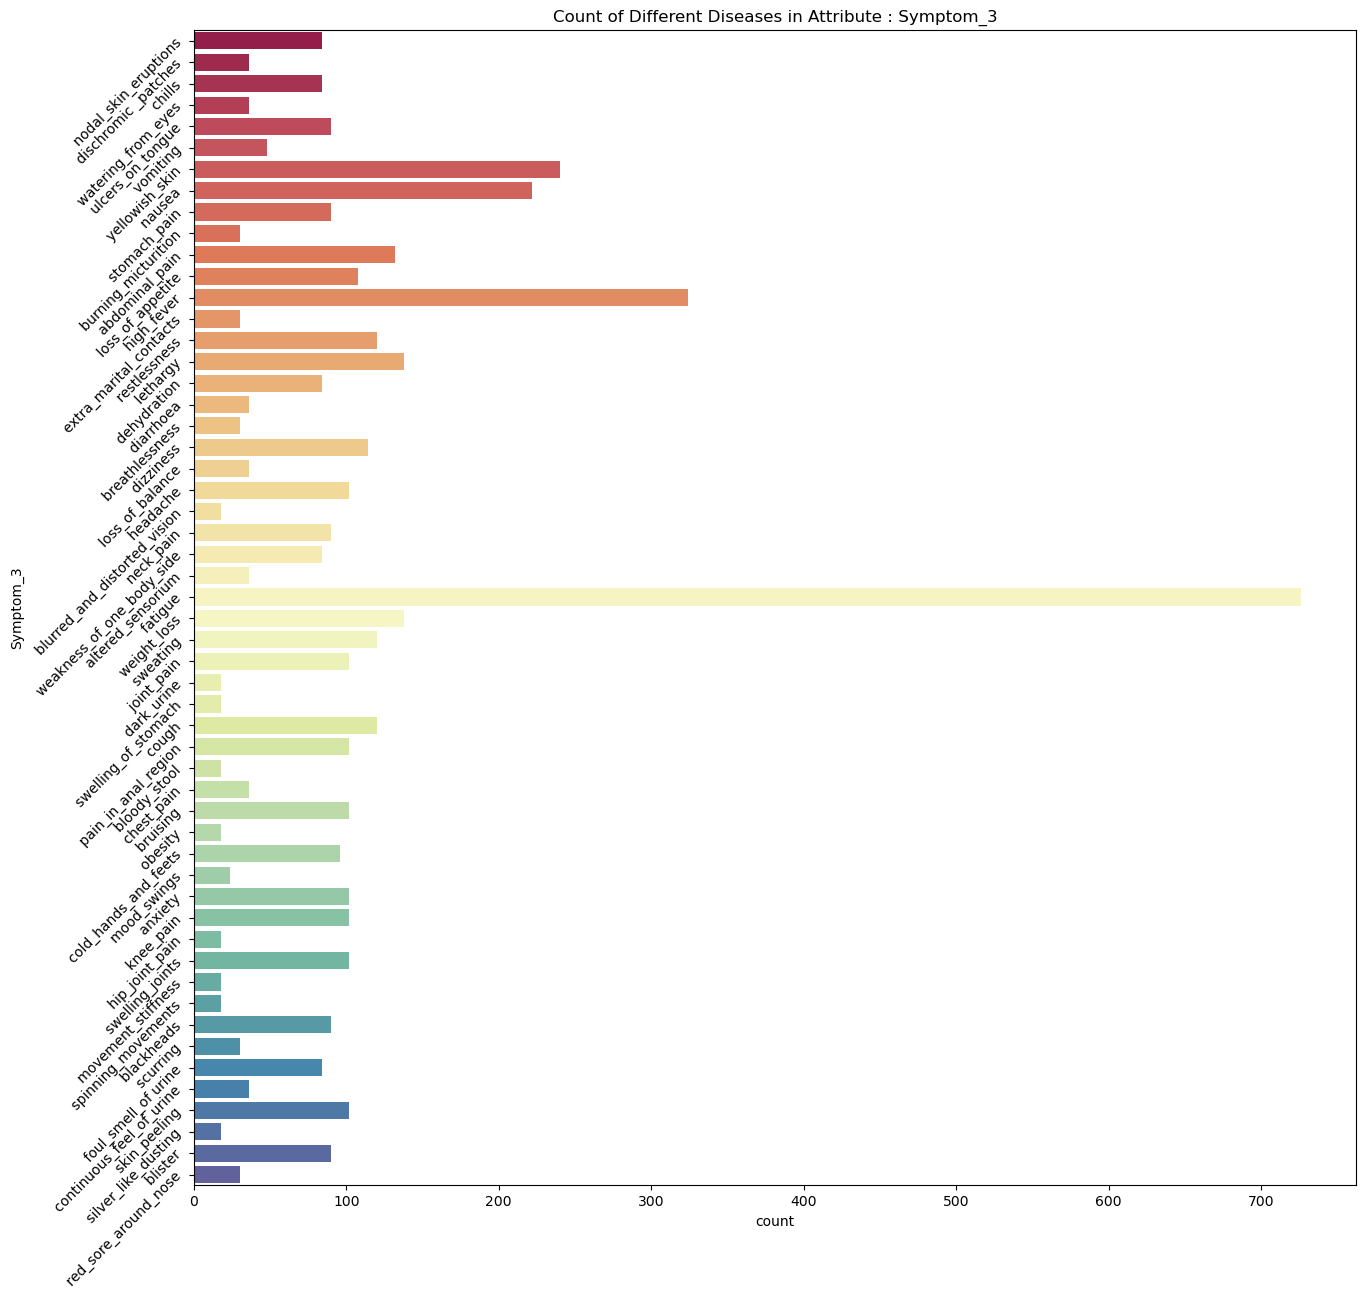

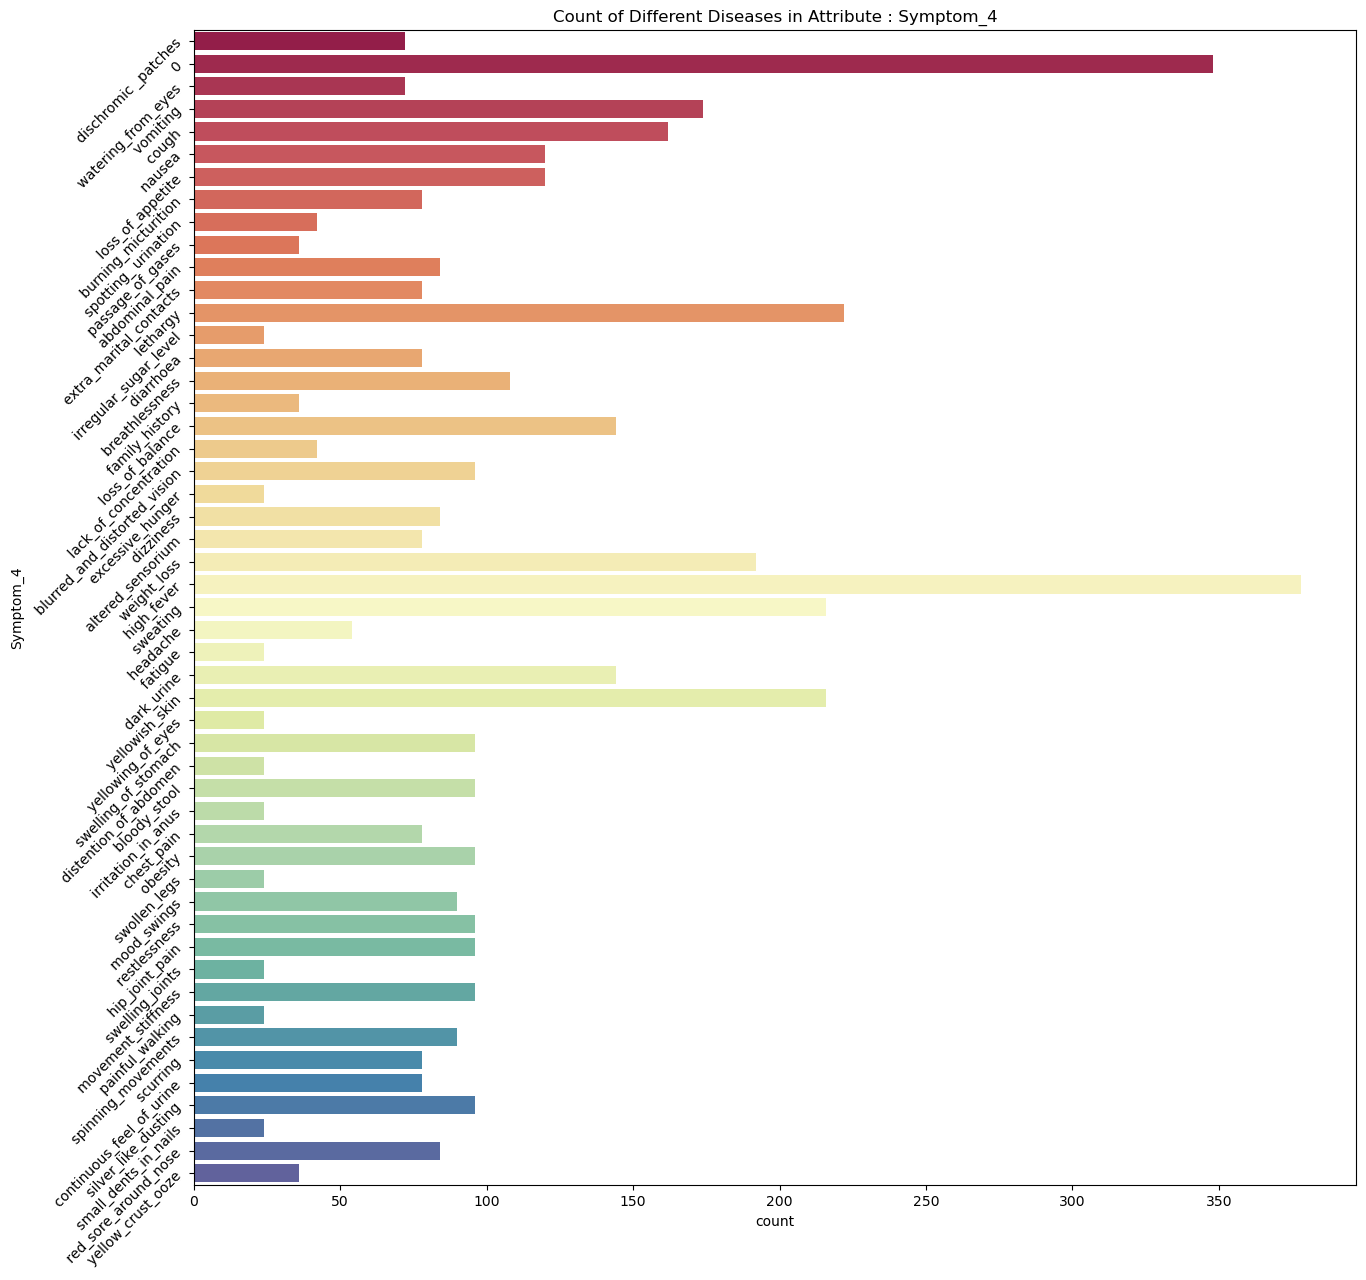

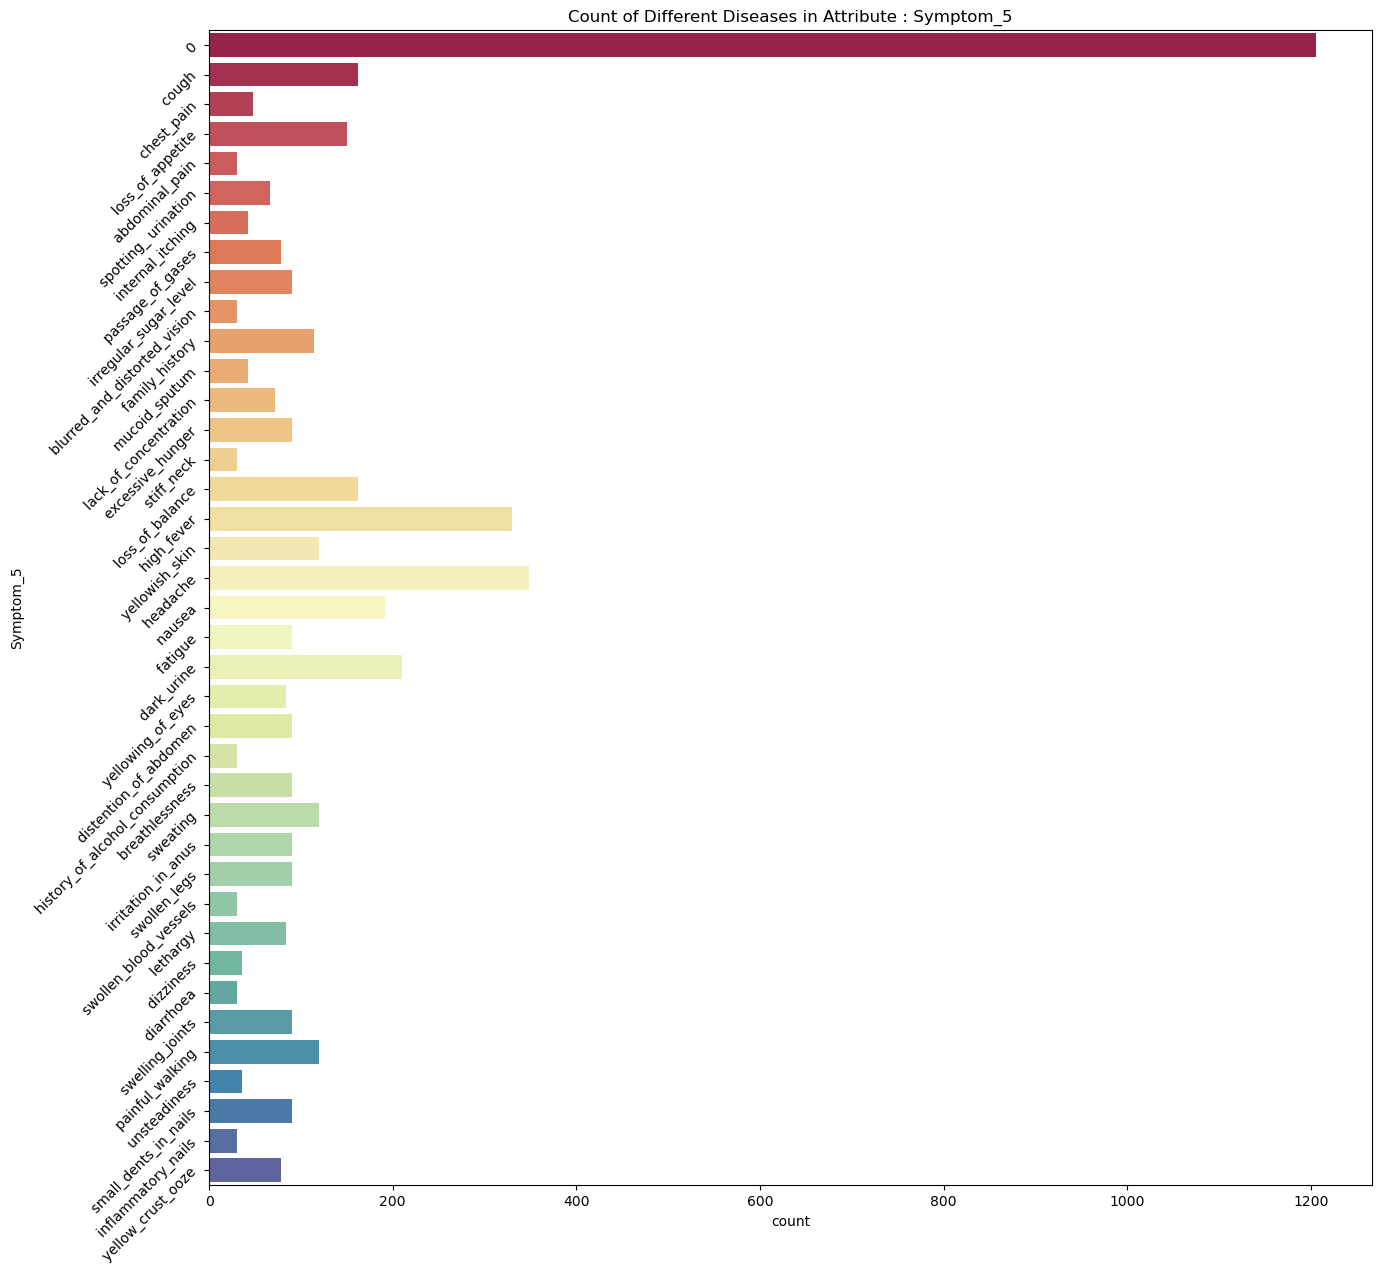

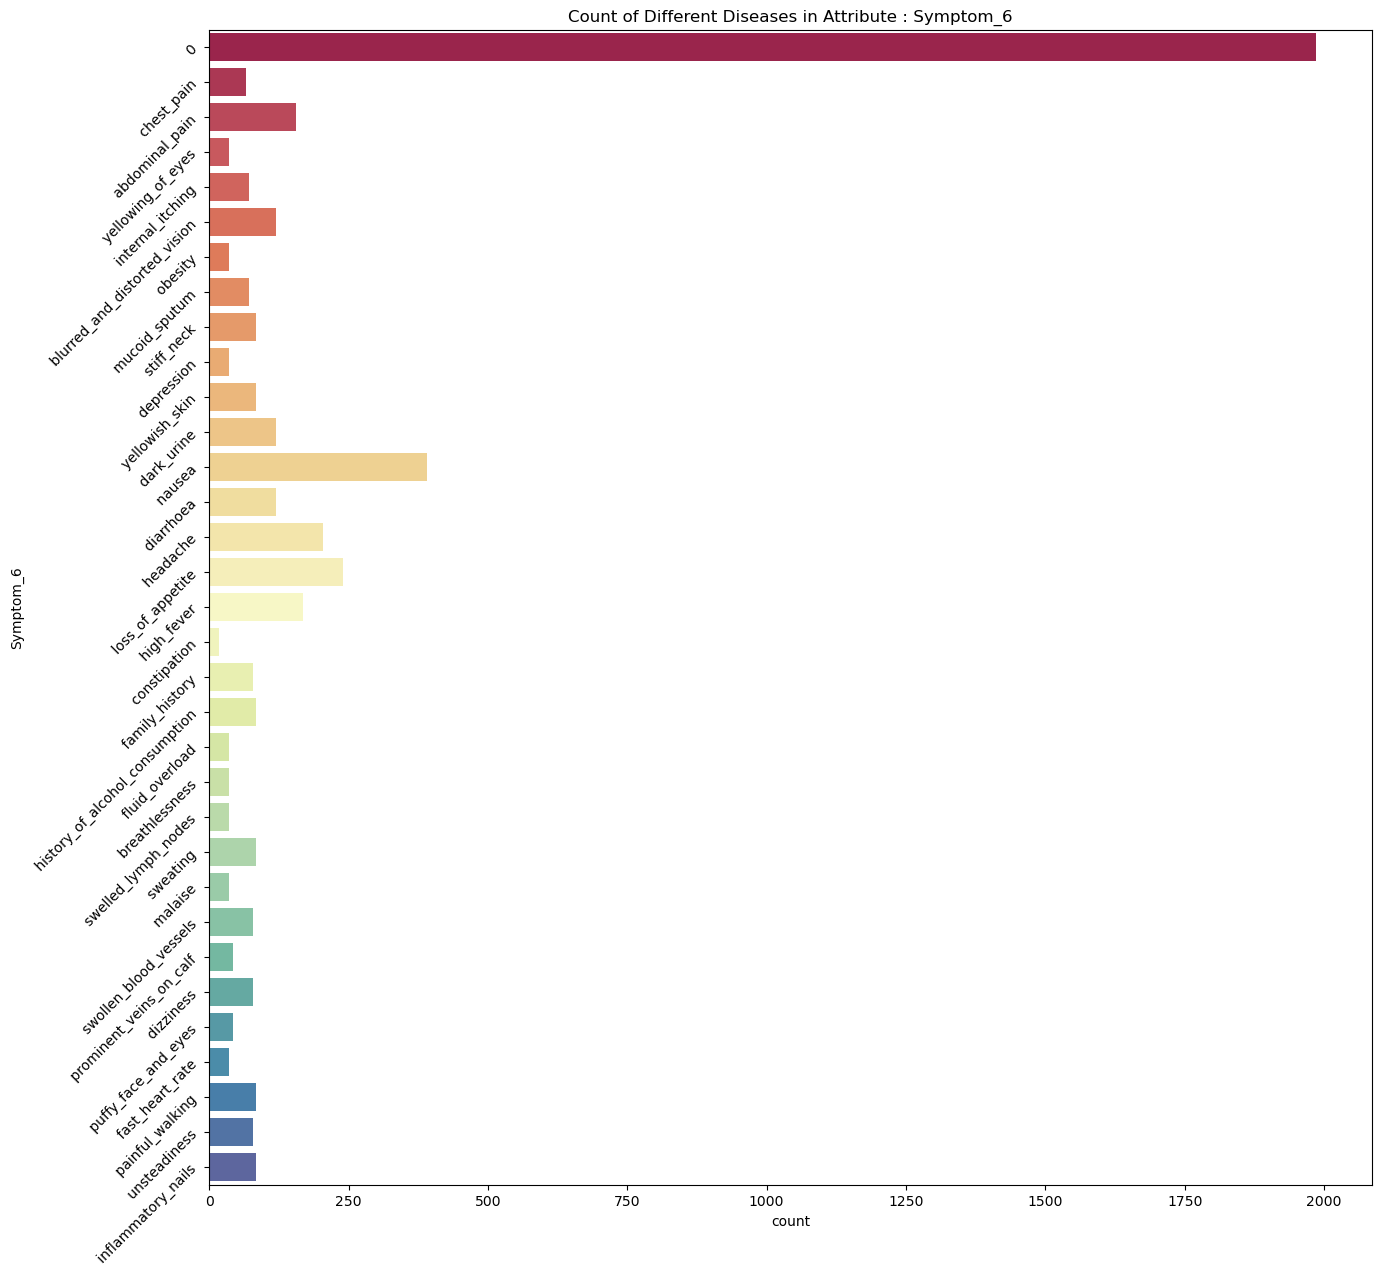

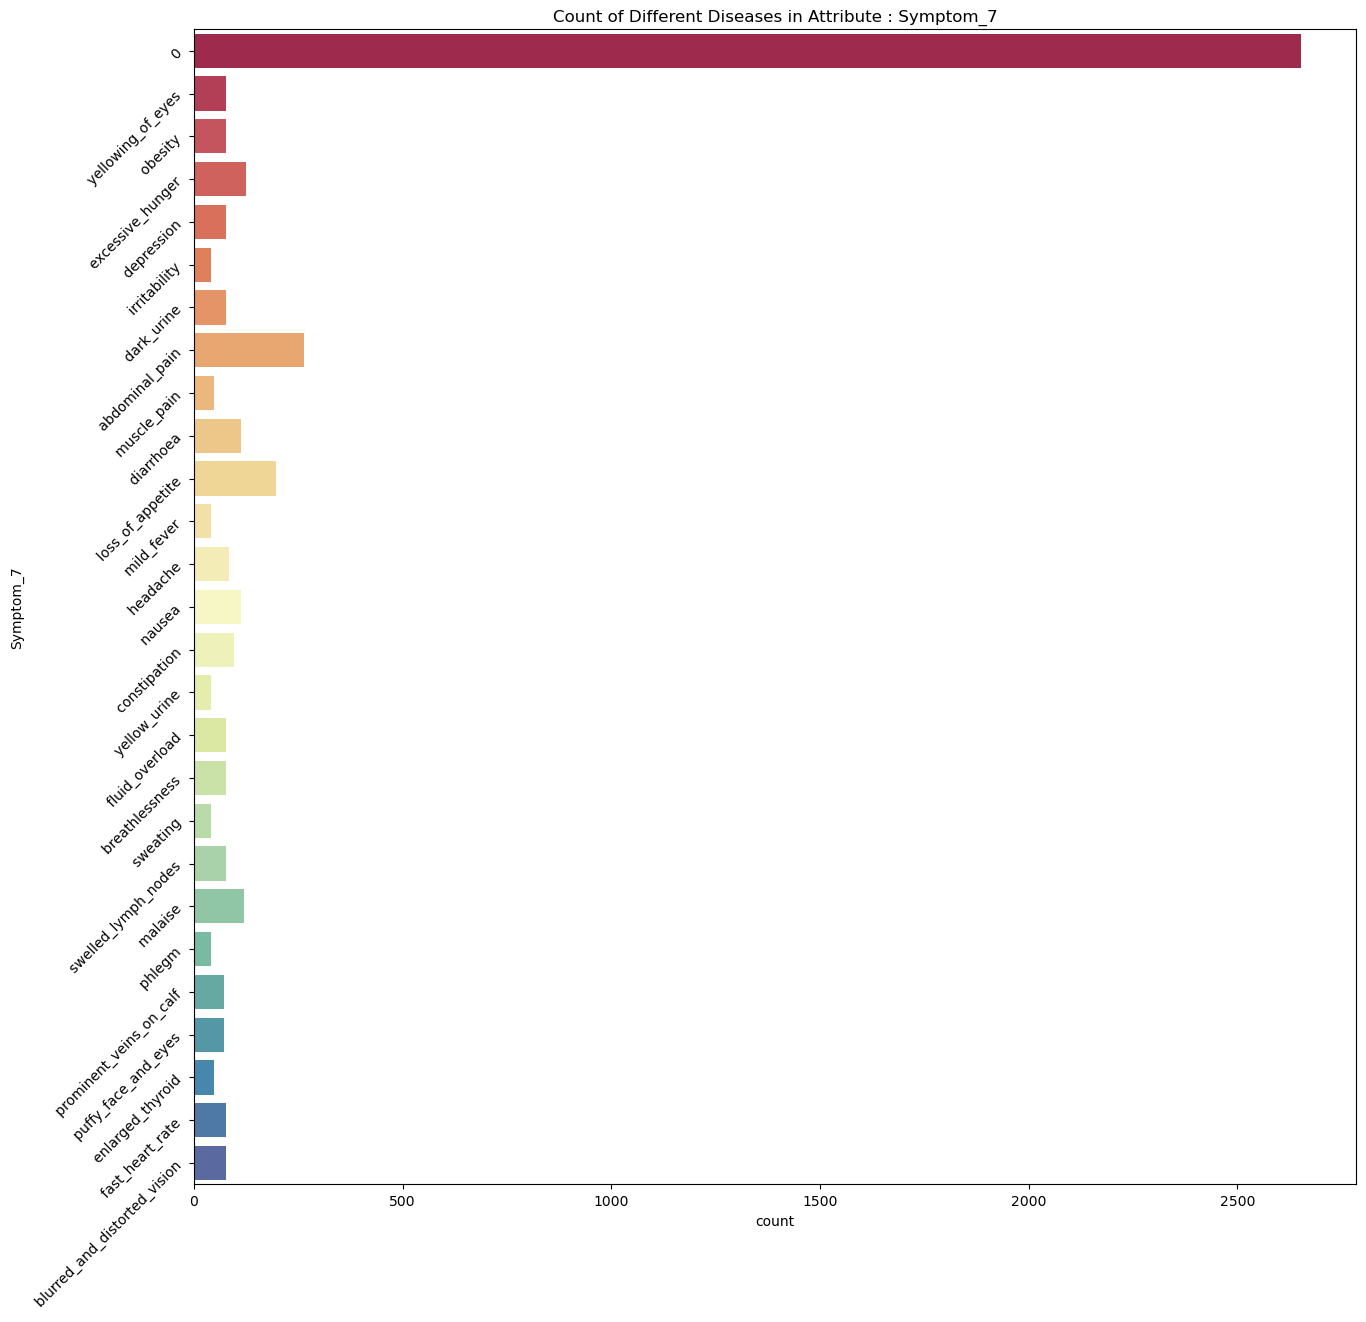

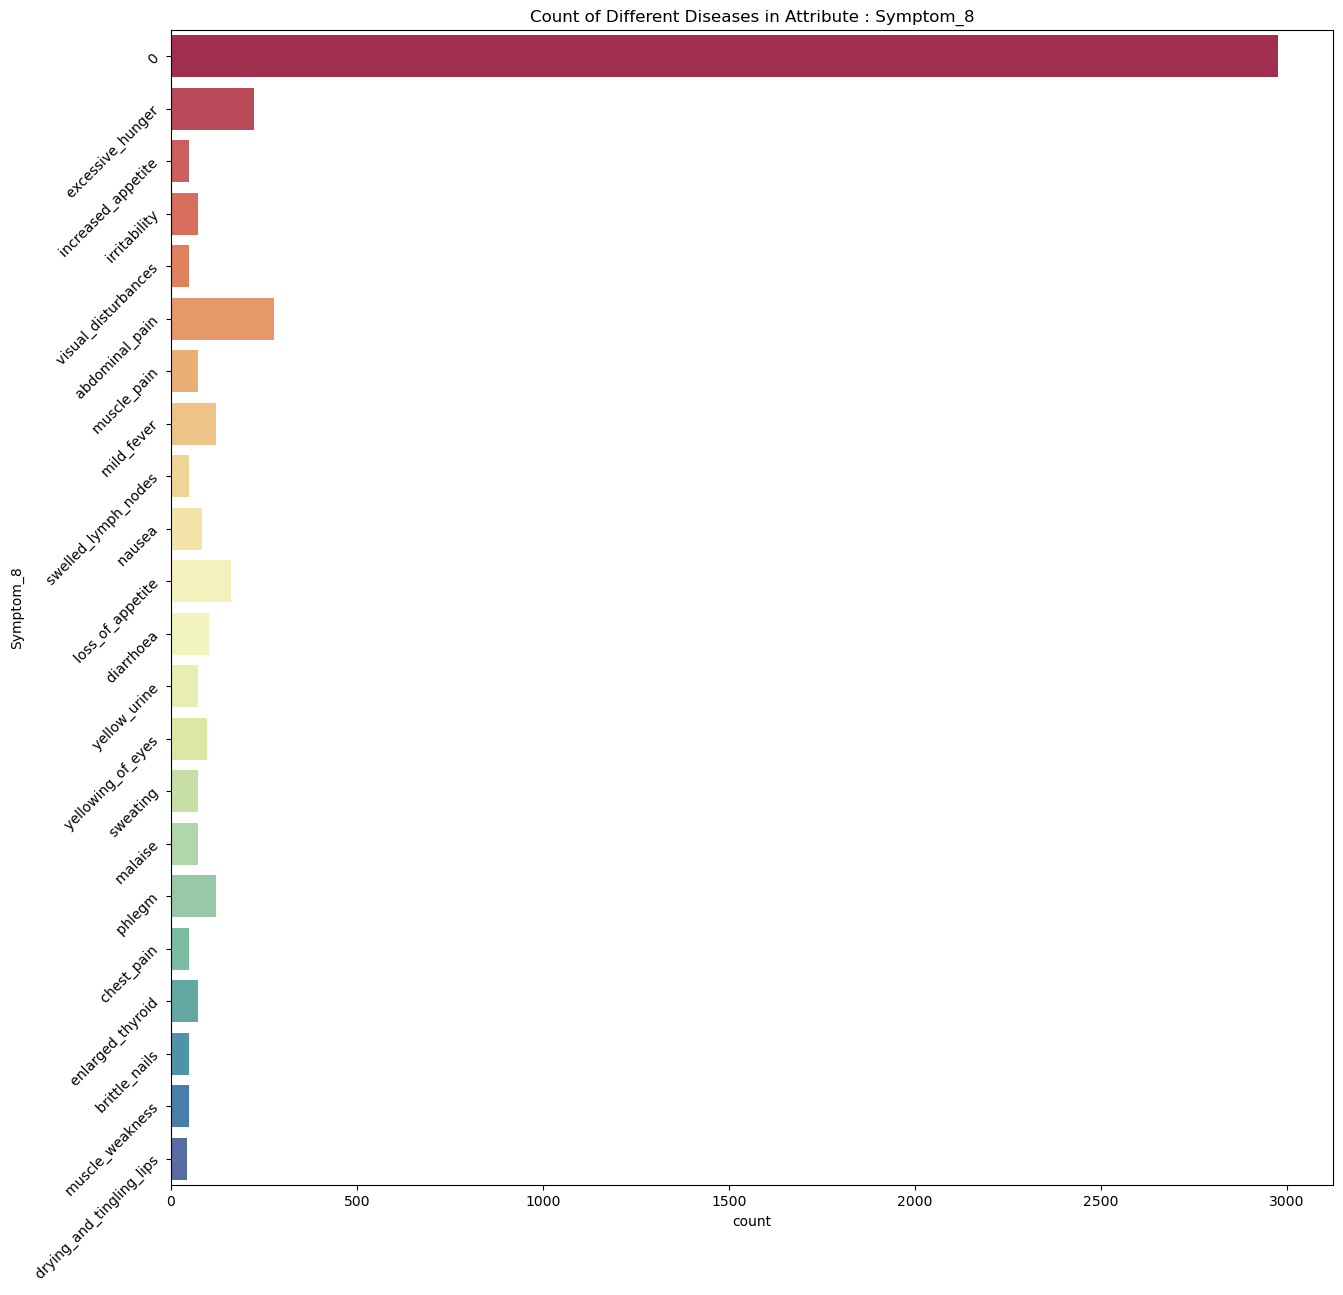

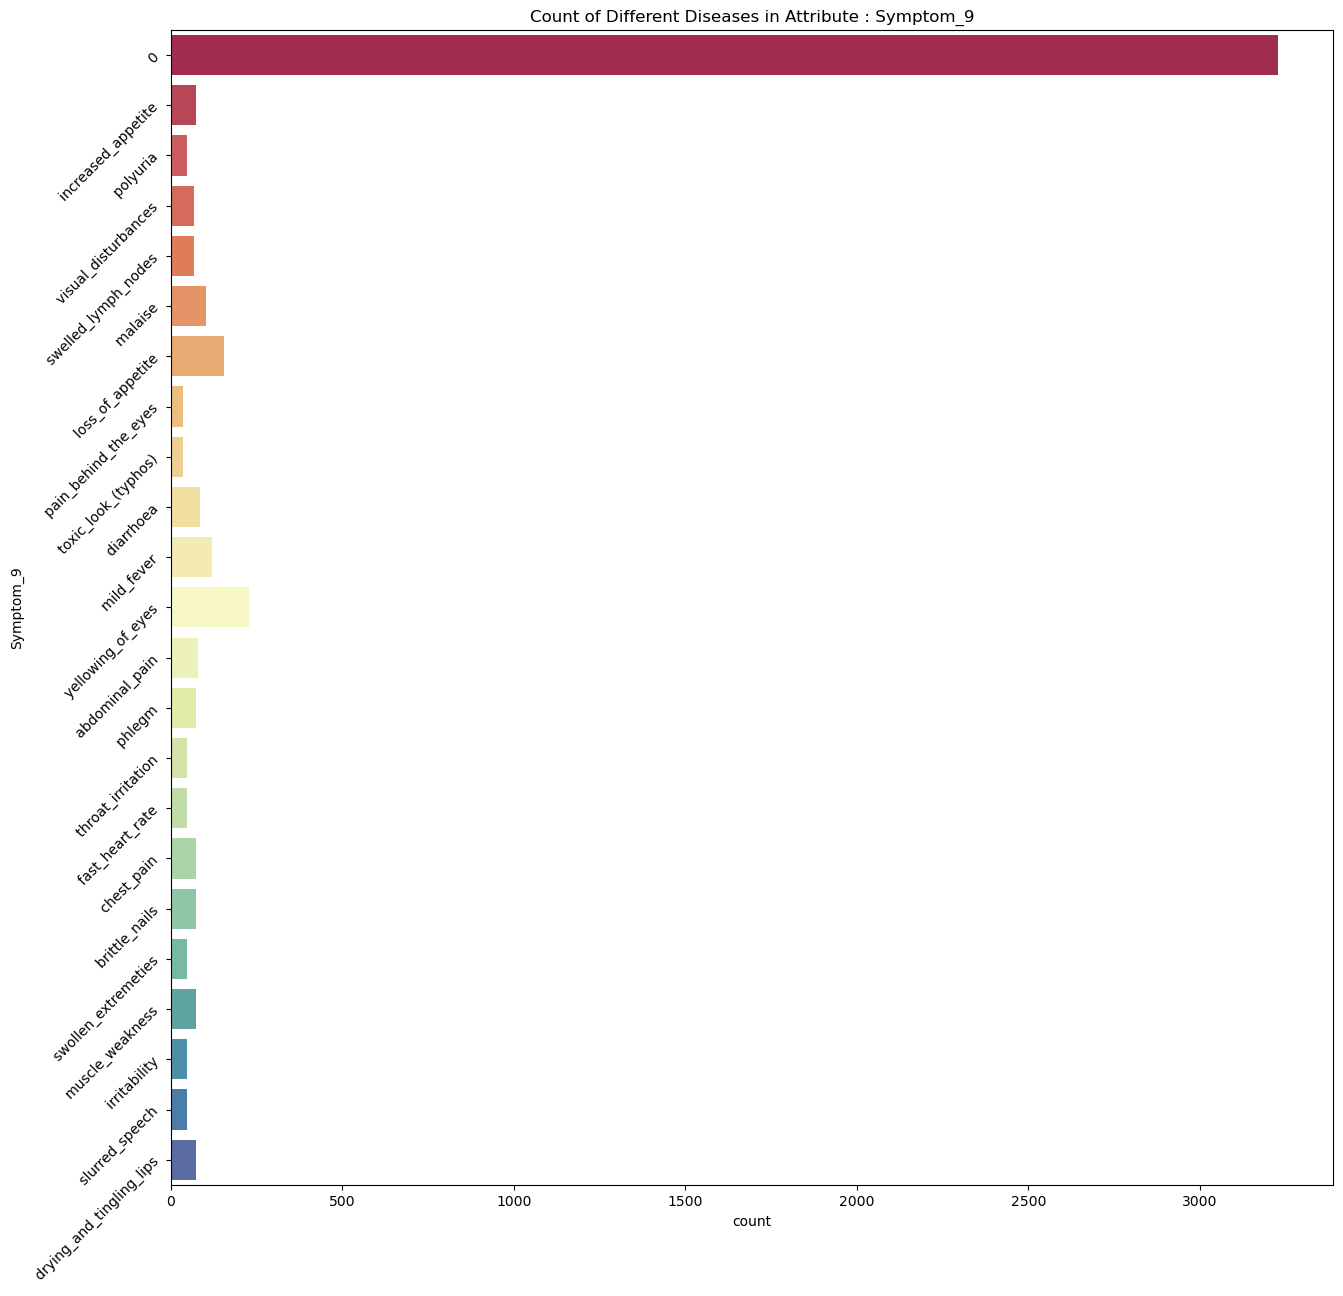

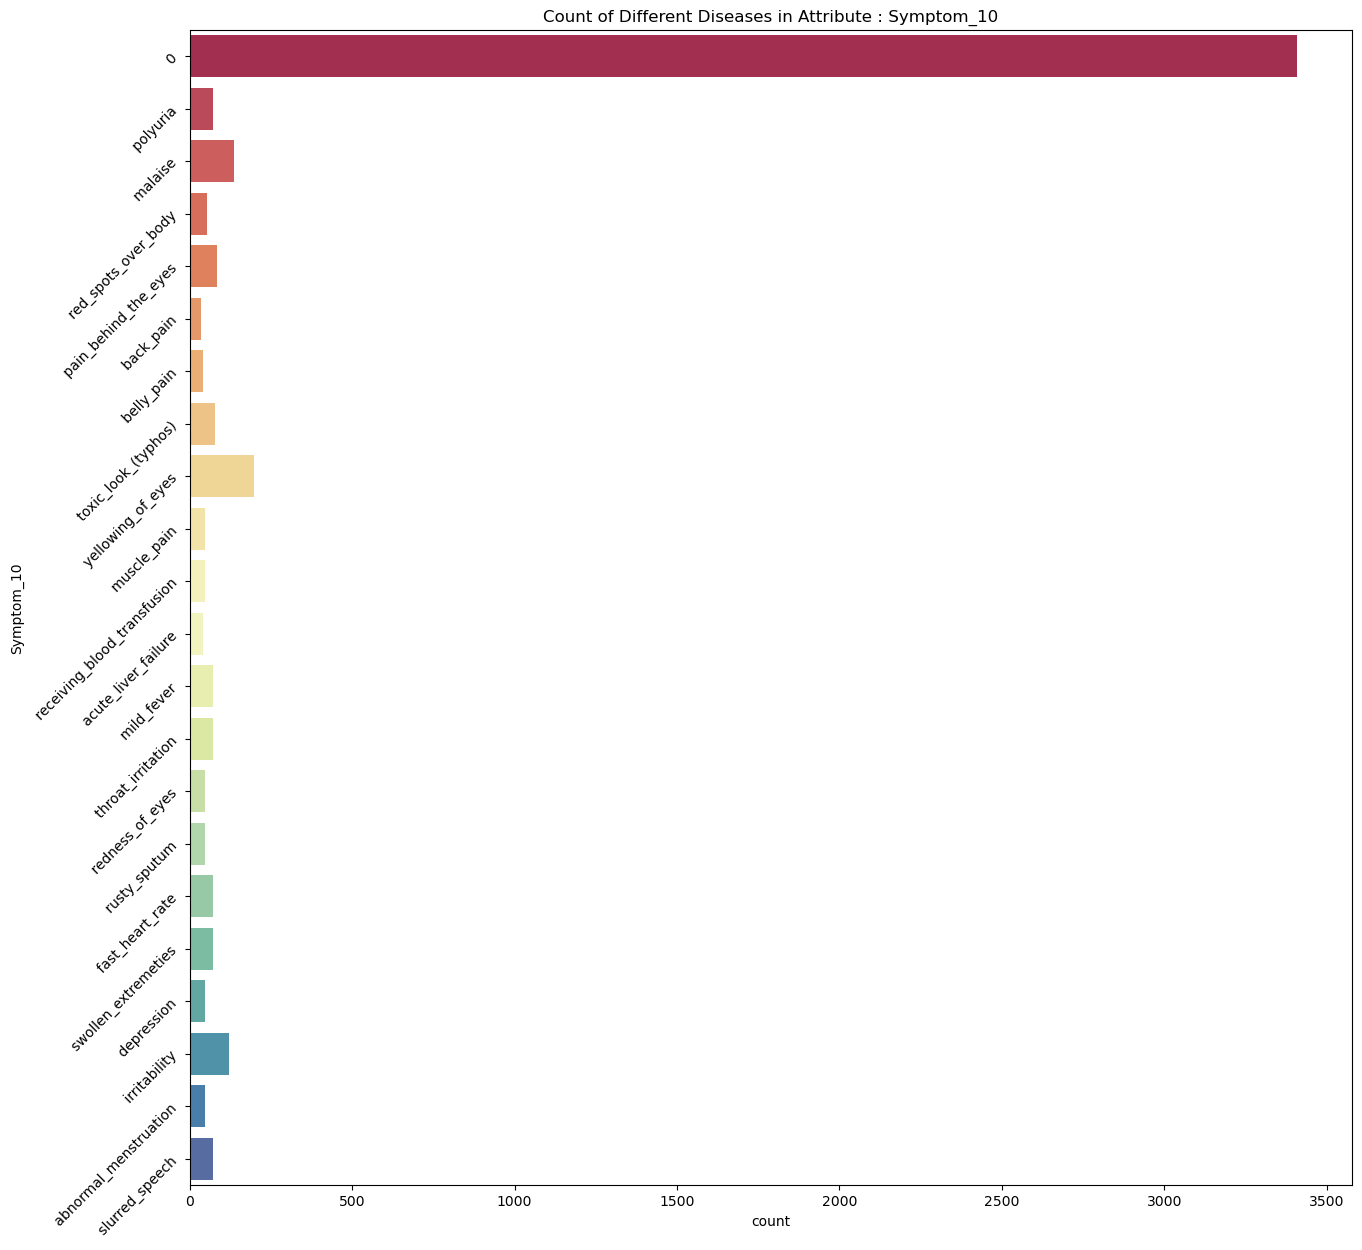

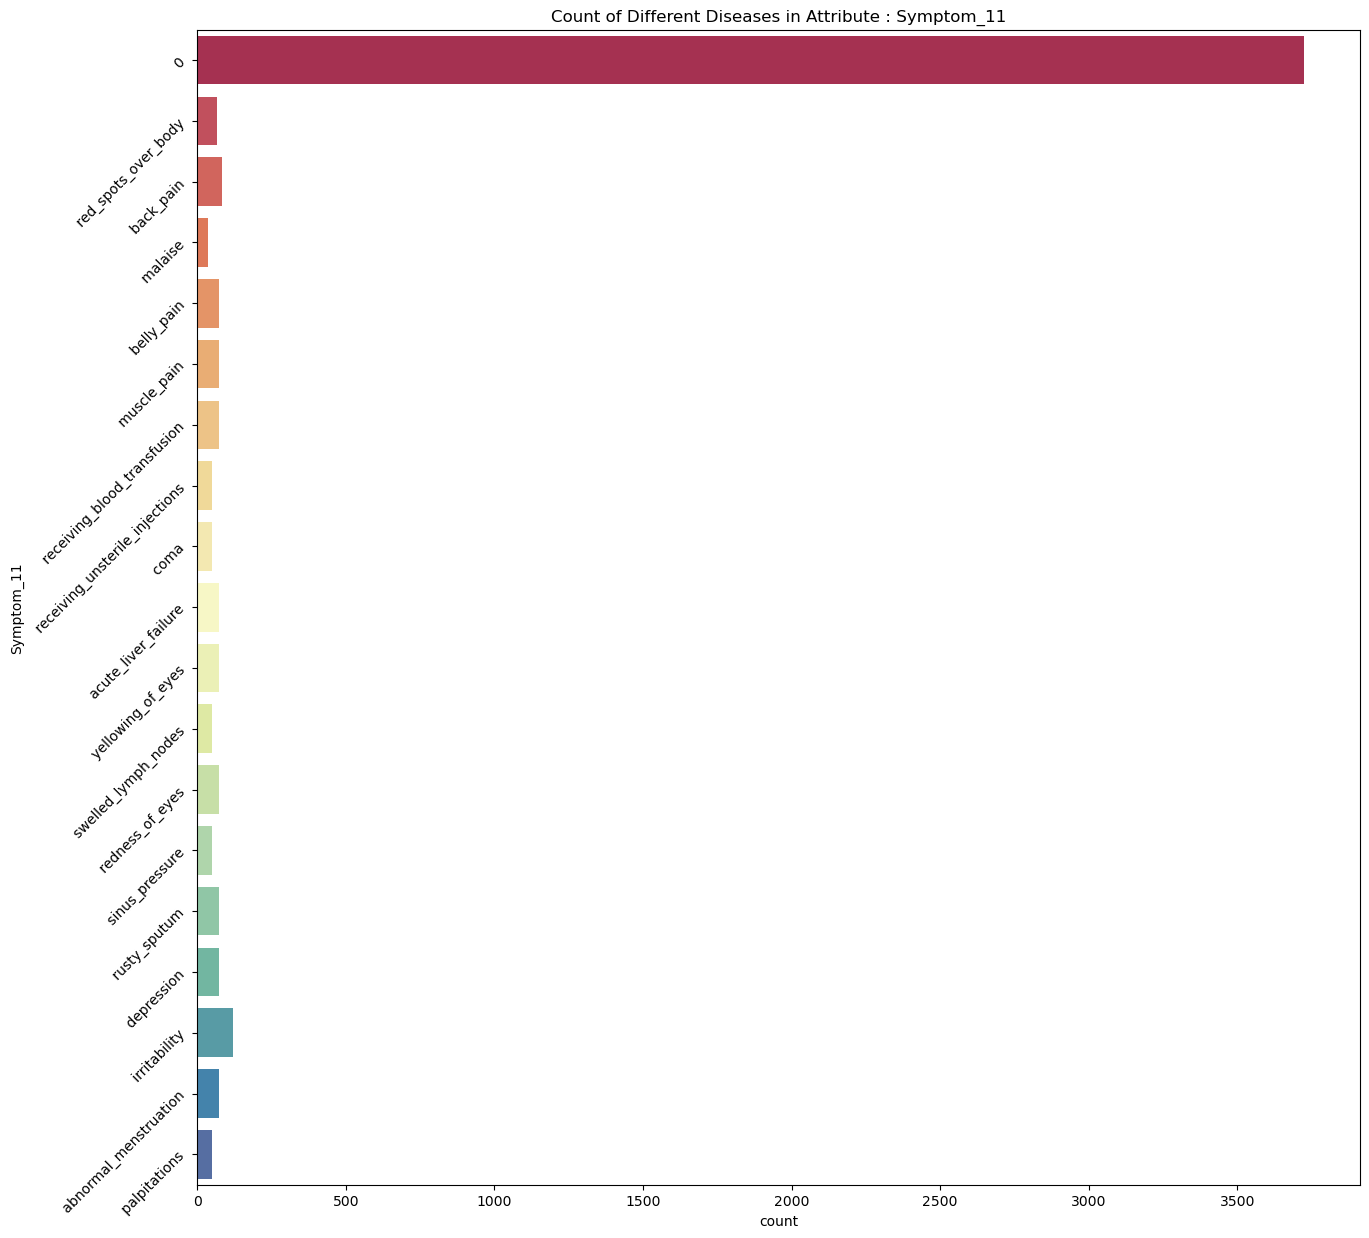

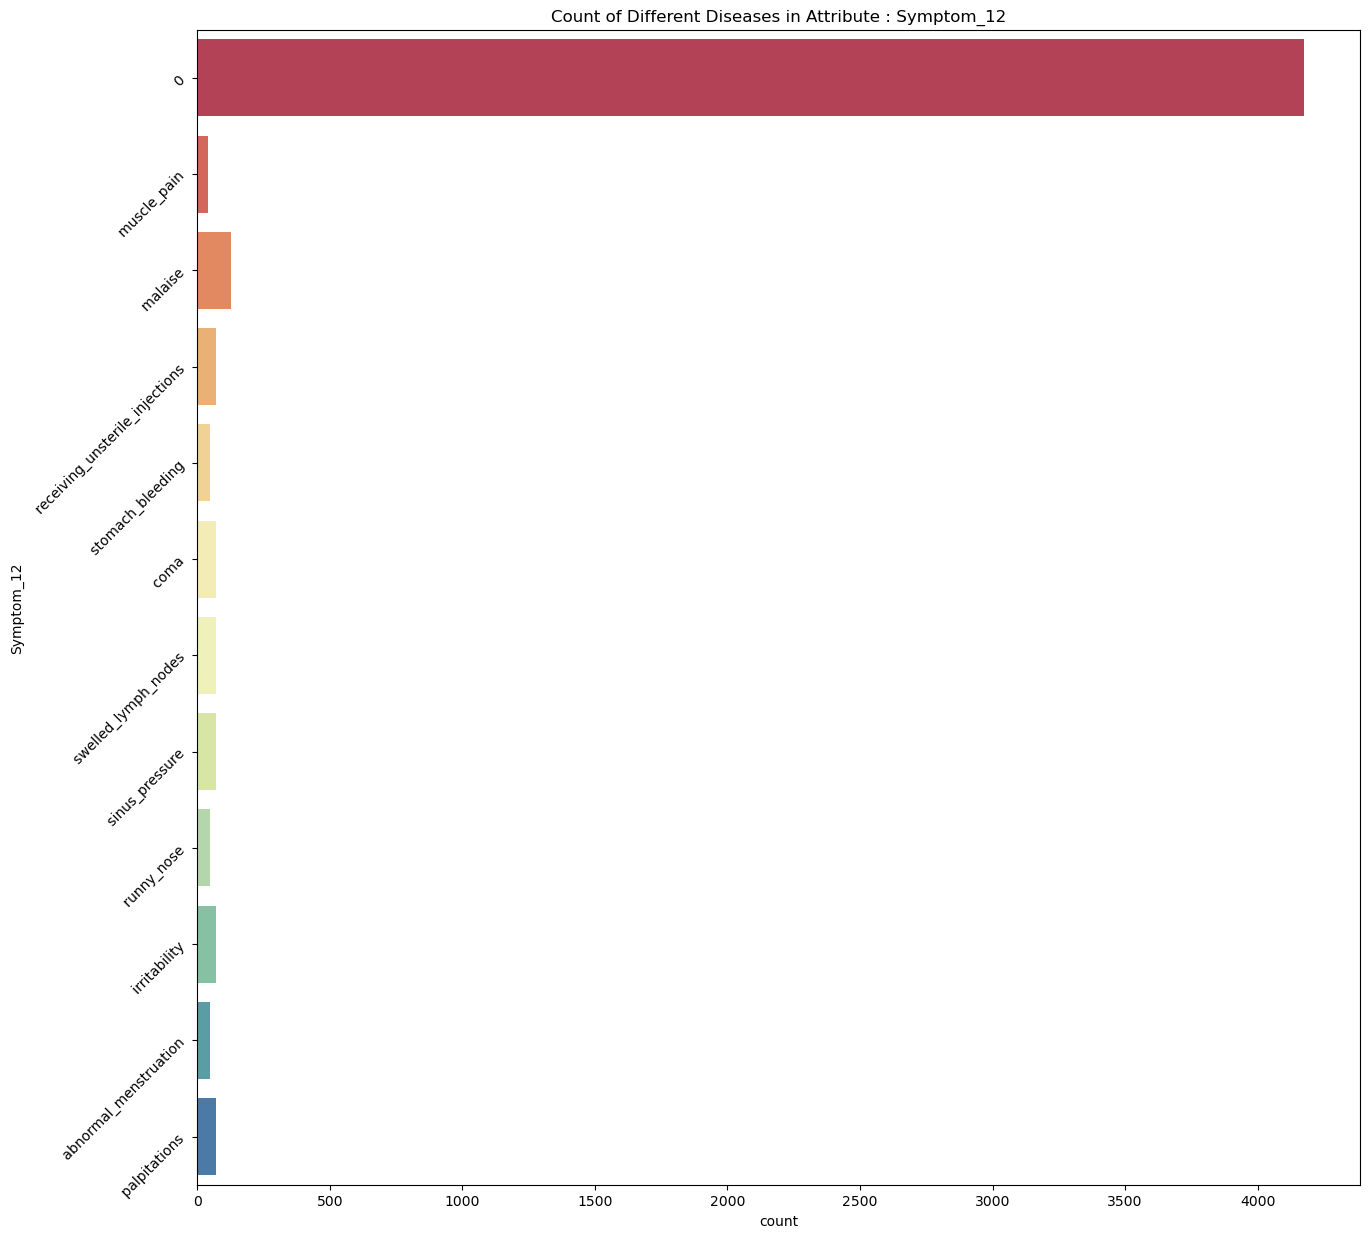

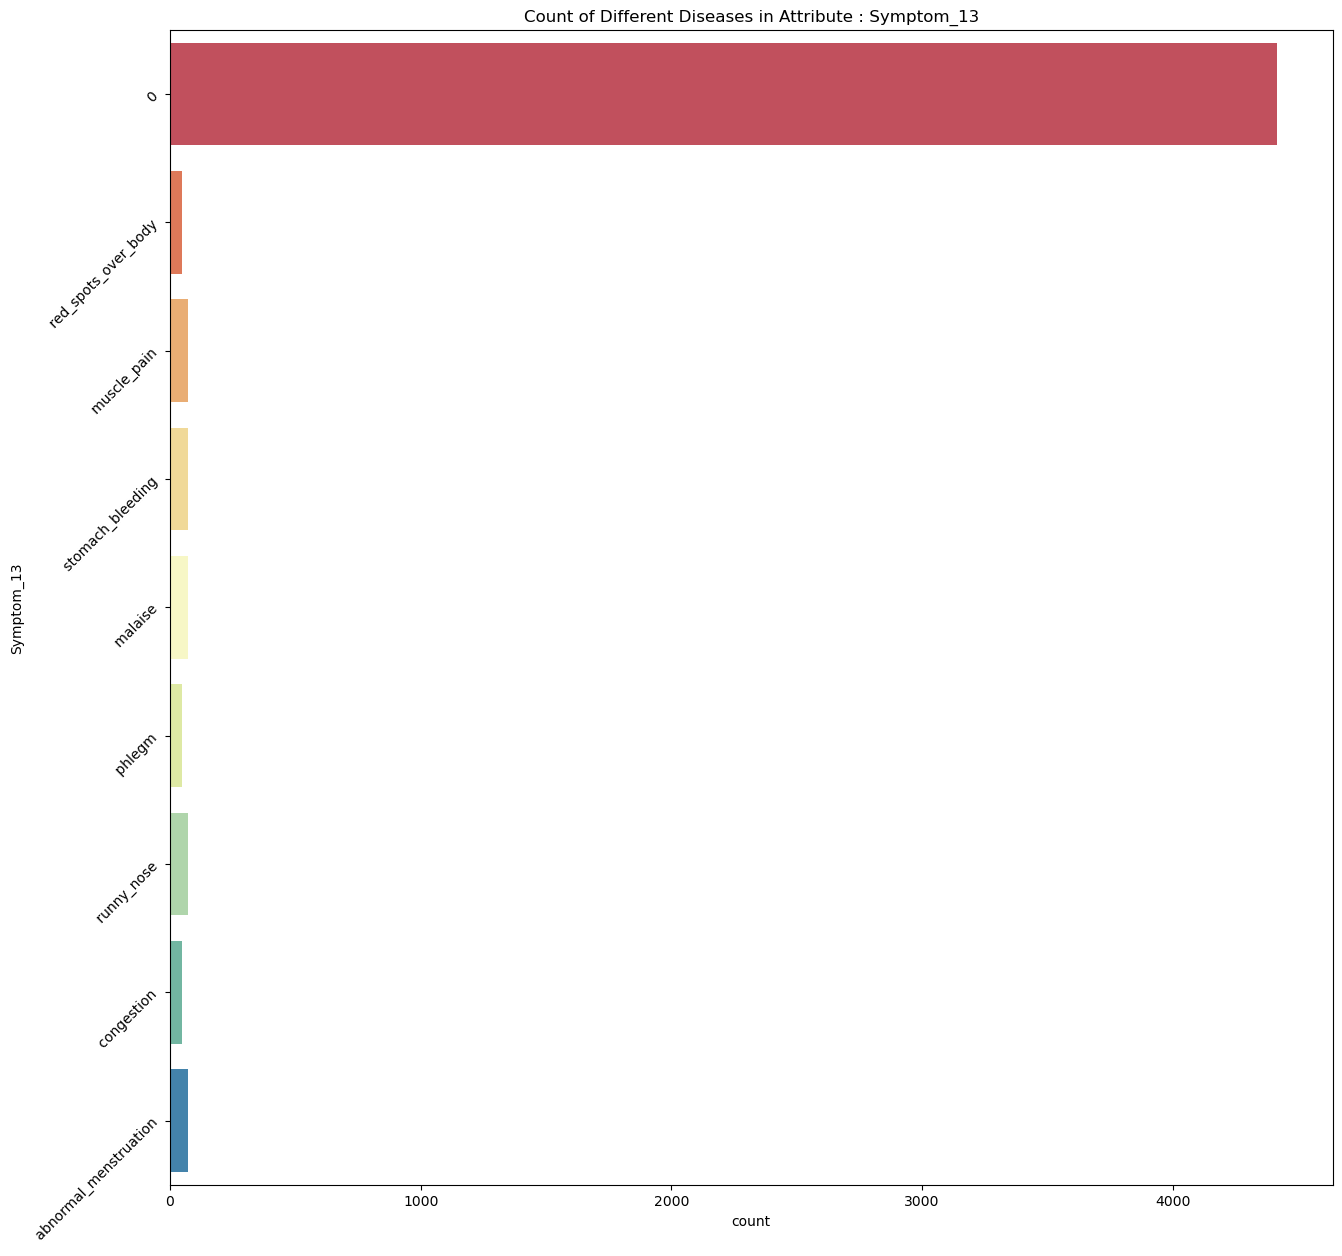

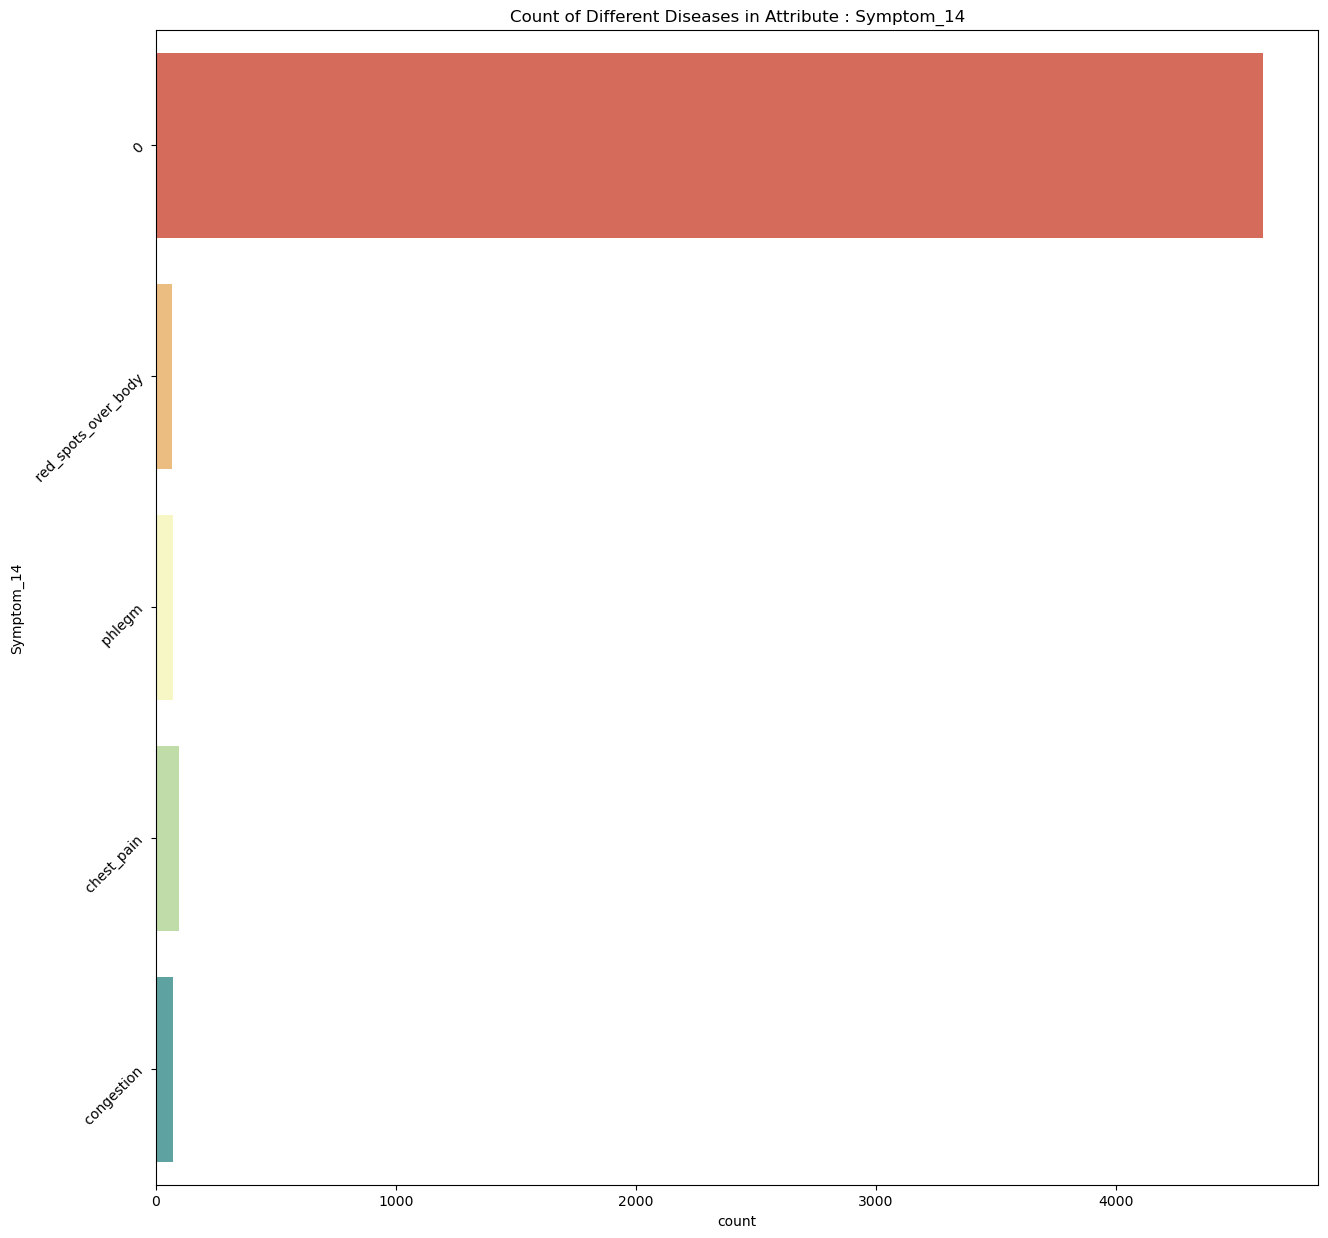

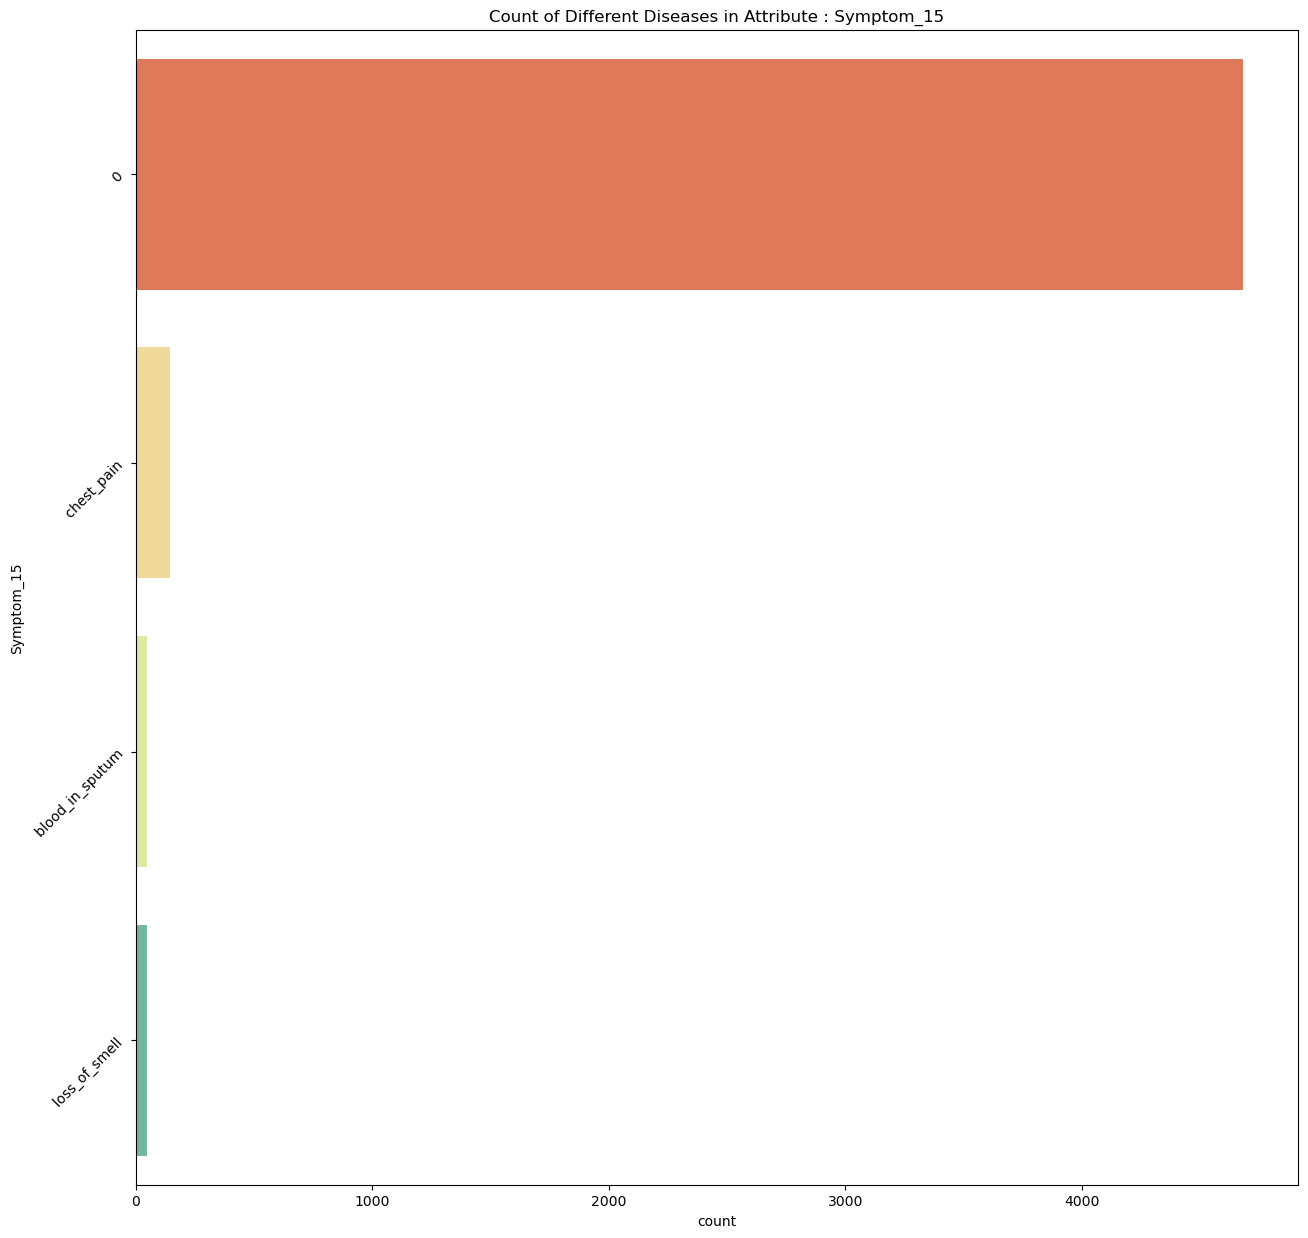

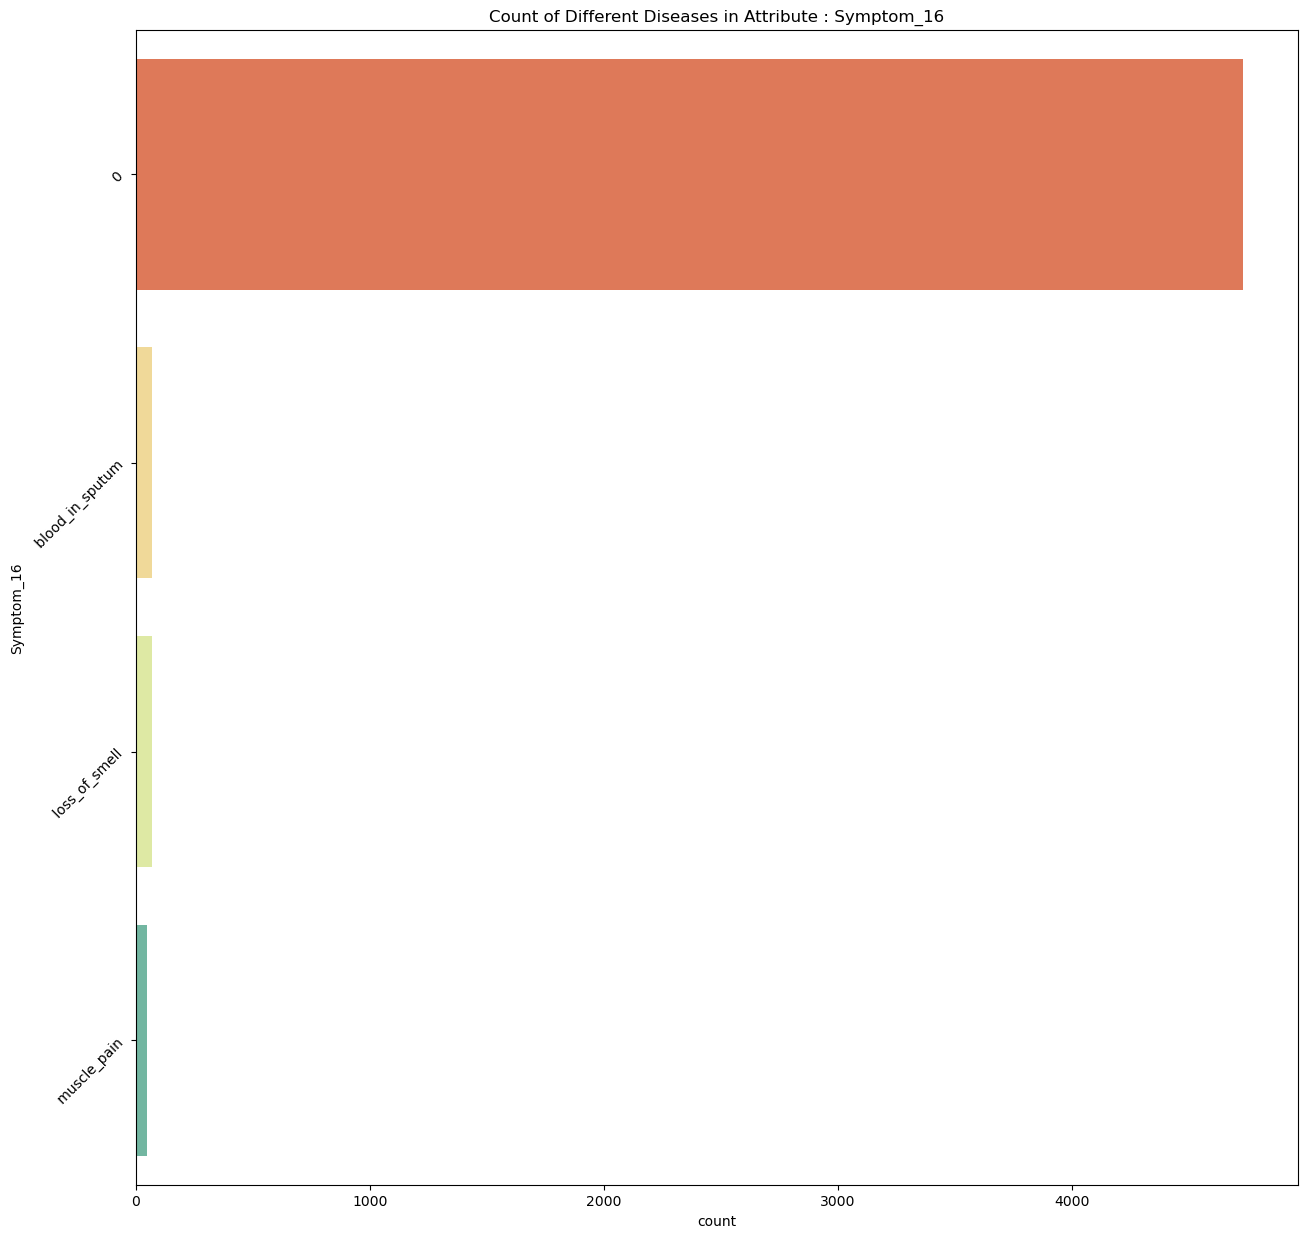

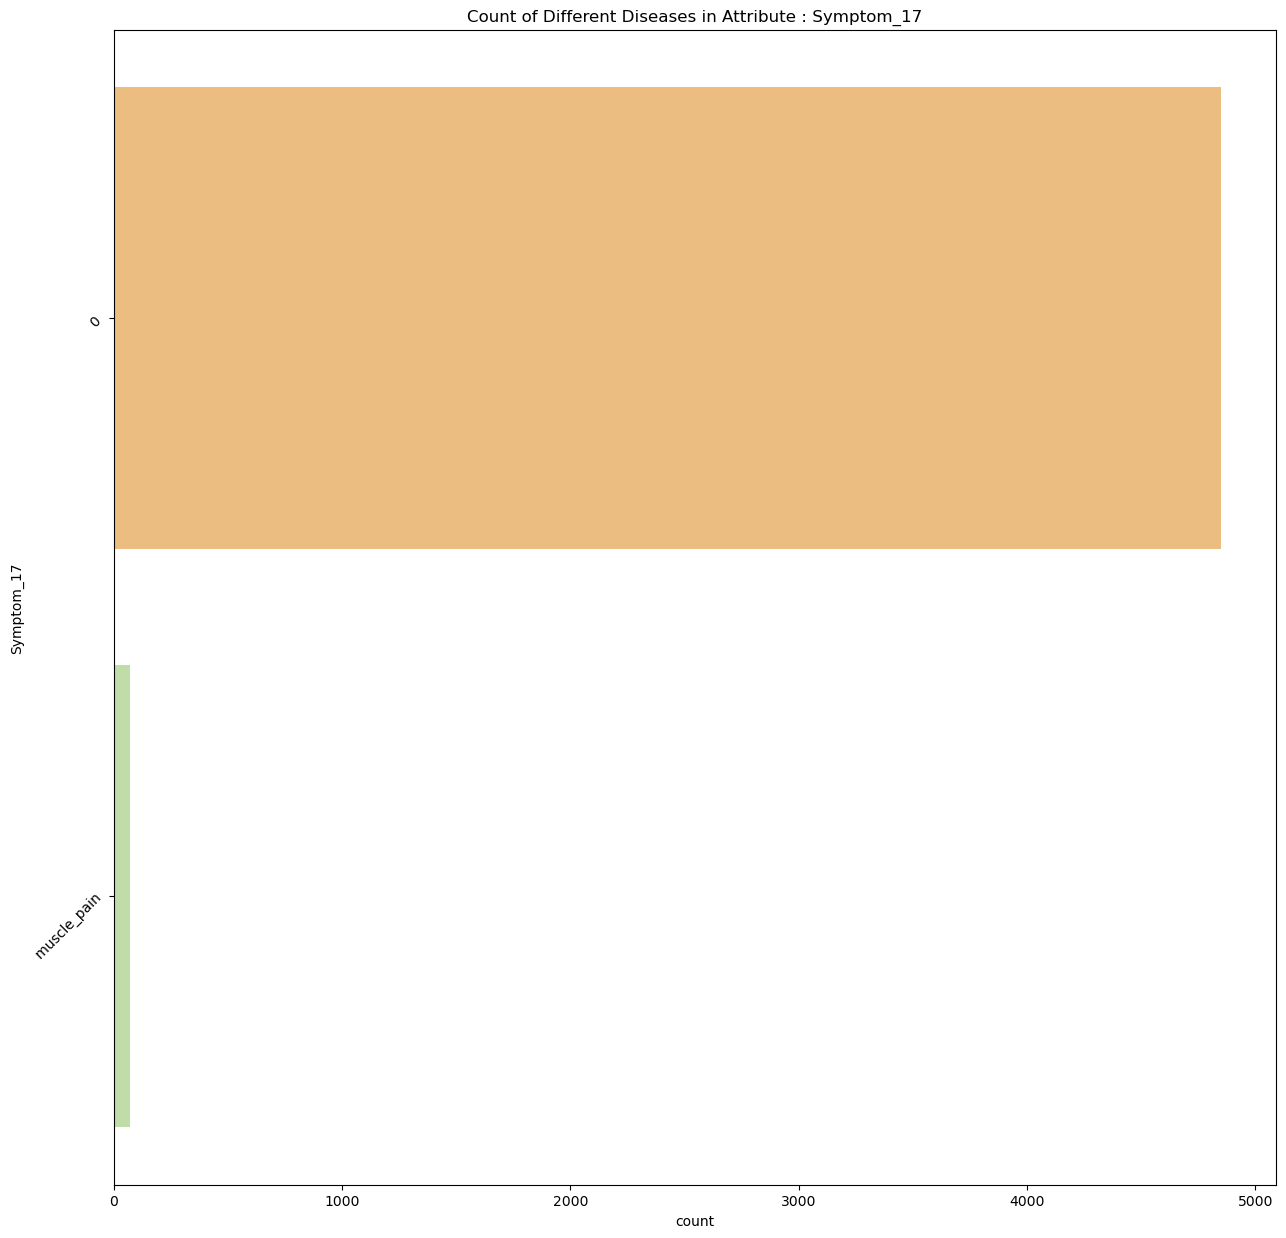

In [24]:


for attribute in dataset.columns[1:]:
    plt.figure(figsize=(15, 15))
    sns.countplot(y=attribute, data=dataset, palette="Spectral")
    plt.yticks(rotation=45)
    plt.title("Count of Different Diseases in Attribute : "+attribute)
    plt.show()

# Load Symptom data.........................

In [38]:
symptom_set = pd.read_csv('dataset/Symptom-severity.csv')
Symptoms = symptom_set['Symptom']
symptom_set.head()

,Symptom,weight
0,itching,1
1,skin_rash,3
2,nodal_skin_eruptions,4
3,continuous_sneezing,4
4,shivering,5


# Create Final DataSet.......................

In [41]:
DataSet_final = pd.DataFrame()
DataSet_final['Disease'] = dataset['Disease']

DataSet_final[Symptoms] = 0
DataSet_final

,Disease,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,Fungal infection,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,(vertigo) Paroymsal Positional Vertigo,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4916,Acne,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4917,Urinary tract infection,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4918,Psoriasis,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
for index, row in dataset.iterrows():
    for symptom in dataset.columns[1:]:
        if row[symptom] != 0:
            DataSet_final.loc[index, row[symptom]] = 1
DataSet_final = DataSet_final.fillna(0)
DataSet_final[DataSet_final.columns[1:]] = DataSet_final[DataSet_final.columns[1:]].astype('int')
DataSet_final.head()

,Disease,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,...,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,Fungal infection,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
DataSet_final.shape

(4920, 263)

In [53]:
DataSet_final.isnull().sum()

Disease                  0
itching                  0
skin_rash                0
nodal_skin_eruptions     0
continuous_sneezing      0
                        ..
 small_dents_in_nails    0
 inflammatory_nails      0
 blister                 0
 red_sore_around_nose    0
 yellow_crust_ooze       0
Length: 263, dtype: int64

# Train Test split..............

In [55]:
y = DataSet_final['Disease']
x = DataSet_final.drop(columns="Disease",axis=1)

In [58]:
from sklearn.preprocessing import LabelEncoder

In [62]:
from sklearn.model_selection import train_test_split

In [64]:
lebelEncoder = LabelEncoder()
y = lebelEncoder.fit_transform(y)

In [77]:
X_train, X_test, y_train, y_test = train_test_split(x,y, train_size=0.6, random_state=50)
X_test, X_val, y_test, y_val = train_test_split(X_test,y_test, test_size=0.2, random_state=50)

In [82]:
print(f"X_train shape: {X_train.shape} \nX_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape} \ny_test shape: {y_test.shape}")
print(f"X_val shape: {X_val.shape} \ny_val shape: {y_val.shape}")

X_train shape: (2952, 262) 
X_test shape: (1574, 262)
y_train shape: (2952,) 
y_test shape: (1574,)
X_val shape: (394, 262) 
y_val shape: (394,)


# Create Model.................

In [91]:
classifiers = {
    'Random Forest': RandomForestClassifier(),
    'GradientBoost': GradientBoostingClassifier(),
    'ExtraTrees': ExtraTreesClassifier()
}

def train_and_evaluate_classifier(name, clf, X_train, y_train, X_test, y_test, X_val, y_val):
    kfold = KFold(n_splits=10, shuffle=True, random_state=1)
    cv_scores = cross_val_score(clf, X_train, y_train, cv=kfold, scoring='f1_weighted')
    print(f'cross-validation mean F1 score: {cv_scores.mean():.3f}\n')

    clf.fit(X_train, y_train)

    test_predictions = clf.predict(X_test)
    test_f1 = f1_score(y_test, test_predictions, average='weighted')
    test_roc = roc_auc_score(y_test, clf.predict_proba(X_test), multi_class='ovr')
    print(f'test F1 Score: {test_f1:.4f}\nAUC-ROC Score: {test_roc:.4f}\n')
    
    val_predictions = clf.predict(X_val)
    val_f1 = f1_score(y_val, val_predictions, average='weighted')
    val_roc = roc_auc_score(y_val, clf.predict_proba(X_val), multi_class='ovr')
    print(f'validation F1 Score: {val_f1:.4f}\nAUC-ROC Score: {val_roc:.4f}\n\n')
    
    with open(f"{name}.pkl", "wb") as f:
        pickle.dump(clf, f)

for name, clf in classifiers.items():
    print(f"Training and evaluating   {name}.................")
    train_and_evaluate_classifier(name, clf, X_train, y_train, X_test, y_test, X_val, y_val)


Training and evaluating   Random Forest.................
cross-validation mean F1 score: 1.000

test F1 Score: 1.0000
AUC-ROC Score: 1.0000

validation F1 Score: 1.0000
AUC-ROC Score: 1.0000


Training and evaluating   GradientBoost.................
cross-validation mean F1 score: 0.999

test F1 Score: 1.0000
AUC-ROC Score: 1.0000

validation F1 Score: 1.0000
AUC-ROC Score: 1.0000


Training and evaluating   ExtraTrees.................
cross-validation mean F1 score: 1.000

test F1 Score: 1.0000
AUC-ROC Score: 1.0000

validation F1 Score: 1.0000
AUC-ROC Score: 1.0000




In [93]:
Symptom_Description=pd.read_csv("dataset/symptom_Description.csv")
Symptom_Description.head()

,Disease,Description
0,Drug Reaction,An adverse drug reaction (ADR) is an injury ca...
1,Malaria,An infectious disease caused by protozoan para...
2,Allergy,An allergy is an immune system response to a f...
3,Hypothyroidism,"Hypothyroidism, also called underactive thyroi..."
4,Psoriasis,Psoriasis is a common skin disorder that forms...


In [95]:
Symptom_Precaution=pd.read_csv("dataset/symptom_precaution.csv")
Symptom_Precaution.head()

,Disease,Precaution_1,Precaution_2,Precaution_3,Precaution_4
0,Drug Reaction,stop irritation,consult nearest hospital,stop taking drug,follow up
1,Malaria,Consult nearest hospital,avoid oily food,avoid non veg food,keep mosquitos out
2,Allergy,apply calamine,cover area with bandage,NaN,use ice to compress itching
3,Hypothyroidism,reduce stress,exercise,eat healthy,get proper sleep
4,Psoriasis,wash hands with warm soapy water,stop bleeding using pressure,consult doctor,salt baths


In [107]:
attributes=DataSet_final.columns[1:]
diseases = DataSet_final['Disease'].unique()

In [108]:
def pred_result(m, X, sd, sp):
    proba = m.predict_proba(X)
    
    top5_idx = np.argsort(proba[0])[-5:][::-1]
    top5_proba = np.sort(proba[0])[-5:][::-1]
    
    top5_diseases = diseases[top5_idx]
    
    for i in range(5):
        disease = top5_diseases[i]
        probability = top5_proba[i]
        
        print("Disease Name:", disease)
        print("Probability:", probability)
        
        if disease in sd["Disease"].unique():
            disp = sd[sd['Disease'] == disease].iloc[0, 1]
            print("Disease Description:", disp)
        
        if disease in sp["Disease"].unique():
            c = np.where(sp['Disease'] == disease)[0][0]
            precuation_list = sp.iloc[c, 1:].dropna().tolist()
            print("Recommended Things to do at home:")
            for precaution in precuation_list:
                print(precaution)
        print("\n")

In [109]:
def main():
    t = pd.Series([0] * len(attributes), index=attributes)
    with open("ExtraTrees.pkl", 'rb') as f:
        m = pickle.load(f)
    
    symptoms_to_include = ["chest_pain", "phlegm", "runny_nose", "high_fever", "throat_irritation", "congestion", "redness_of_eyes"]
    t.loc[symptoms_to_include] = 1
    
    t_array = t.to_numpy().reshape(1, -1)
    
    pred_result(m, t_array, Symptom_Description, Symptom_Precaution)

if __name__ == "__main__":
    main()

Disease Name: Urinary tract infection
Probability: 0.1
Disease Description: Urinary tract infection: An infection of the kidney, ureter, bladder, or urethra. Abbreviated UTI. Not everyone with a UTI has symptoms, but common symptoms include a frequent urge to urinate and pain or burning when urinating.
Recommended Things to do at home:
drink plenty of water
increase vitamin c intake
drink cranberry juice
take probiotics


Disease Name: Drug Reaction
Probability: 0.1
Disease Description: An adverse drug reaction (ADR) is an injury caused by taking medication. ADRs may occur following a single dose or prolonged administration of a drug or result from the combination of two or more drugs.
Recommended Things to do at home:
stop irritation
consult nearest hospital
stop taking drug
follow up


Disease Name: Peptic ulcer diseae
Probability: 0.09
Disease Description: Peptic ulcer disease (PUD) is a break in the inner lining of the stomach, the first part of the small intestine, or sometimes th